In [214]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

%matplotlib inline

In [215]:
#importing the datset

import titanicdata
train_set=pd.read_csv("titanicdata/train.csv")#dataframe
test_set=pd.read_csv("titanicdata/test.csv")
print("TRAINING DATAFRAME" +str(train_set.shape))
print("TEST DATAFRAME" +str(test_set.shape))
train_set

TRAINING DATAFRAME(891, 12)
TEST DATAFRAME(418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [216]:
np.max(np.array(train_set["Fare"]))

512.3292

In [217]:
#CONVERTING TO ARRAY 
#Directly converting to nummpy will render it as an OBJECT as the dataframe has multiple datatypes
def dftonumpy(df):
    
    #GENDER
    sex=np.array(df["Sex"])
    gender={"female":1,"male":2}
    df["Sex"]=[gender.get(x,x) for x in sex]
    
    #EMBARKED
    embark=np.array(df["Embarked"])
    towns={"S":1,"C":2,"Q":3}
    df["Embarked"]=[towns.get(x,x) for x in embark]
    
    #CABIN
    cab={"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
    df["Cabin"]=df["Cabin"].fillna("U0")
    cabin=np.array(df["Cabin"])
    df["Cabin"]=[cab.get(x[0],0) for x in cabin]
    
    #AGE replacing NaN with random values in the range of std
    age_set=df["Age"]
    size=age_set.isnull().sum()
    mean=int(age_set.mean())
    std=int(age_set.std())
    age_copy=age_set.copy()
    values=(np.random.randint((mean-std),(mean+std),size=size))
    age_copy[np.isnan(age_copy)]=values
    df["Age"]=age_copy
    
    
    #DATASET
    data=(df[["Pclass","Sex","Age","SibSp","Parch","Fare","Cabin","Embarked"]]).fillna(0) #fill nan values with  0
    data_set=data.to_numpy()
    return(data_set)
train_x=dftonumpy(train_set)
train_set_y=(train_set["Survived"]).to_numpy()
train_y=train_set_y.reshape(train_x.shape[0],1)
test_x=dftonumpy(test_set)
print("TRAINING SET X SHAPE" +str(train_x.shape))
print("TRAINING SET Y SHAPE" +str(train_y.shape))
print("TEST SET X SHAPE" +str(test_x.shape))
print(train_x)

TRAINING SET X SHAPE(891, 8)
TRAINING SET Y SHAPE(891, 1)
TEST SET X SHAPE(418, 8)
[[ 3.      2.     22.     ...  7.25    8.      1.    ]
 [ 1.      1.     38.     ... 71.2833  3.      2.    ]
 [ 3.      1.     26.     ...  7.925   8.      1.    ]
 ...
 [ 3.      1.     38.     ... 23.45    8.      1.    ]
 [ 1.      2.     26.     ... 30.      3.      2.    ]
 [ 3.      2.     32.     ...  7.75    8.      3.    ]]


In [218]:
def sigmoid(arr):
    A=np.exp(arr)/(1+np.exp(arr))
    return A
def norm(arr):
    normalized=(arr/(np.max(arr)))*10
    return normalized
def mnnorm(arr):
    normalized=(arr/(np.max(arr)-np.min(arr)))
    return normalized
train_x[:,5]=(norm(train_x[:,5]))
train_x[:,2]=((mnnorm(train_x[:,2]))*10)
print(train_x[:,2])


[ 2.7645137   4.77506911  3.26715255  4.39808997  4.39808997  4.14677055
  6.78562453  0.25131943  3.39281226  1.75923599  0.50263885  7.28826338
  2.51319427  4.90072883  1.75923599  6.91128424  0.25131943  3.7697914
  3.89545112  4.27243026  4.39808997  4.27243026  1.8848957   3.51847198
  1.00527771  4.77506911  1.8848957   2.38753456  3.14149284  4.77506911
  5.02638854  2.26187484  5.27770797  8.29354109  3.51847198  5.27770797
  1.8848957   2.63885398  2.26187484  1.75923599  5.02638854  3.39281226
  3.39281226  0.37697914  2.38753456  4.77506911  4.02111083  4.39808997
  2.51319427  2.26187484  0.87961799  2.63885398  6.15732596  3.64413169
  8.16788138  3.26715255  2.63885398  3.58130183  0.62829857  1.38225685
  2.7645137   4.77506911  5.65468711  0.50263885  3.01583312  4.52374969
  3.64413169  2.38753456  2.13621513  3.26715255  4.02111083  2.01055542
  2.63885398  3.26715255  4.02111083  3.14149284  4.39808997  2.13621513
  0.10429756  3.7697914   2.7645137   3.64413169  3.

In [226]:
def param_init(row,column):
    W=np.random.randn(row,column)*0.01
    b=np.zeros((1,column))
    return W,b

def sigmoid(Z):
    A=np.exp(Z)/(1+np.exp(Z))
    return A
    

In [227]:
def forward(X,Y, W1, b1, W2, b2):
    #x=891,12 w1=12,5 b1=1,5 5hiddenneurons
    Z1=np.dot(X,W1)+b1 #891,5
    A1=sigmoid(Z1)#891,5
    #Z1 = 891,5 W2= 5,1 b2=1,1
    Z2=np.dot(Z1,W2)+b2 #891,1
    A2=sigmoid(Z2)#891,1
    m=X.shape[0]
    cost=((-1/m)*((np.sum(np.multiply((np.log(A2)),Y)))+np.sum(np.multiply((np.log(1-A2)),(1-Y)))))
    dZ2=A2-Y#891,1
    dW2=(1/m)*np.dot(A1.T,dZ2) #dW2==W2 SHAPE 5,1
    db2=(1/m)*np.reshape((np.sum(dZ2,axis=0,keepdims=True)),(1,1)) #db2==b2 shape 1,1
    dA1=dZ2*W2.T #891,5
    dZ1=np.dot(dZ2,W2.T)*dA1 #5,1(.)891,1*891,5==891,5
    dW1=(1/m)*(np.dot(X.T,dZ1))#12,5== 12,891(.) 891,5 
    db1=(1/m)*(np.reshape((np.sum(dZ1,axis=0)),(1,10)))#1,5==1,5
    return cost,dW1,db1,dW2,db2

In [228]:
def backprob(W1, b1, W2, b2,dW1,db1,dW2,db2,alpha):
    W1=W1-(alpha*dW1)
    b1=b1-(alpha*db1)
    W2=W2-(alpha*dW2)
    b2=b2-(alpha*db2)
    return W1,b1,W2,b2

In [229]:
def optimize(X,Y,learning_rate,no_iter, W1, b1, W2, b2):
    costs=[]
    for i in range(no_iter):
        cost,dW1,db1,dW2,db2=forward(X,Y, W1, b1, W2, b2)
        if i%100==0:
            costs.append(cost)
        W1,b1, W2, b2=backprob(W1, b1, W2, b2,dW1,db1,dW2,db2,learning_rate)
    return costs, W1, b1, W2, b2

In [230]:
def predict(X,Y, W1, b1, W2, b2):
    Z1=np.dot(X,W1)+b1 #891,1
    A1=sigmoid(Z1)#891,1
    Z2=np.dot(Z1,W2)+b2 
    A_pred=sigmoid(Z2)
    Y_hat=[]
    for i in A_pred:
        if i<=0.5:
            Y_hat.append(0)
        elif i>0.5:
            Y_hat.append(1)
    return Y_hat

In [231]:
from sklearn.metrics import accuracy_score
def model(X,Y,learning_rate,iter):
    W1,b1=param_init(X.shape[1],10)
    W2,b2=param_init(10,1)
    
    costs, W1_end, b1_end, W2_end, b2_end=optimize(X,Y,learning_rate,iter,W1,b1,W2,b2)
    plt.plot(costs, label=str(learning_rate))
    plt.legend(str(learning_rate))
    plt.show()
    
    Y_pred=predict(X,Y, W1_end, b1_end, W2_end, b2_end)
    accuracy=(100-np.mean(np.abs(Y_pred-Y))*100)
    sklaccuracy=accuracy_score(Y,Y_pred)
    return Y_pred,accuracy,sklaccuracy

C:\Users\amirtha\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
C:\Users\amirtha\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in multiply
  if __name__ == '__main__':


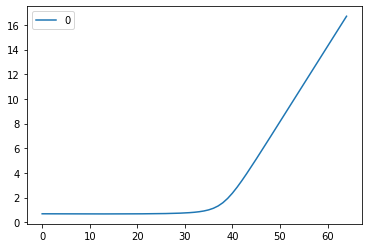

38.38383838383839 0.3838383838383838


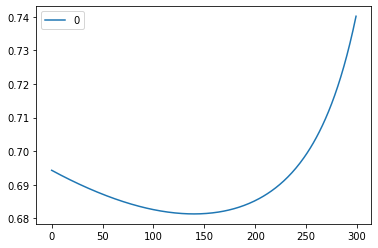

39.76578353682731 0.3557800224466891


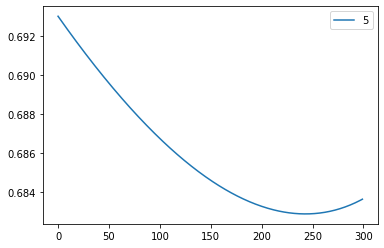

61.61616161616162 0.6161616161616161


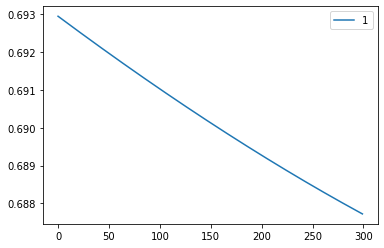

61.61616161616162 0.6161616161616161


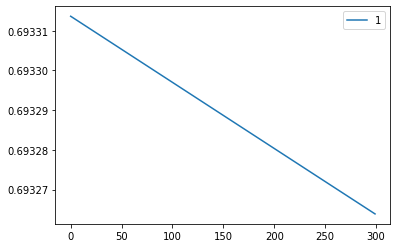

45.55430851727148 0.3288439955106622


In [235]:
lr=[0.001,0.0001,0.00005,0.000015,0.0000001]
for i in (lr):
    pred,acc1,acc2=model(train_x,train_y,i,30000)
    print(acc1,acc2)